In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
#import pydotplus
from sklearn.naive_bayes import CategoricalNB, ComplementNB, MultinomialNB 
from sklearn import svm
from scipy import stats 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from itertools import combinations 

# My Import
from datetime import date
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics  
from sklearn.model_selection import KFold
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
import math

In [2]:
data_frame = pd.read_csv('.\Data_Train_V3.csv', index_col=0)
data_frame.head()

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,income_bin,Mnt_Fruits_min_max,Mnt_Meat_min_max,Mnt_sweet_min_max,Responded_any_time,Mnt_Wines_min_max,Mnt_Gold_Products_min_max,Mnt_Fish_min_max,Responded_old_campains,Responded
ID,,,,,,,,,,,,,,,,,,,,,
5376,1979.0,Graduation,Married,50611.0,1.0,0.0,06/01/2013,42,1.0,1.0,...,4.0,0.000670,0.005025,1.000000,0,0.003861,0.003802,0.002762,0,0.0
6862,1971.0,Graduation,Divorced,1730.0,0.0,0.0,18/05/2014,65,1.0,1.0,...,0.0,0.000670,0.005025,0.001160,0,0.003861,0.003802,0.002762,0,0.0
10749,1991.0,Graduation,Single,8028.0,0.0,0.0,18/09/2012,62,73.0,18.0,...,0.0,0.048895,0.090452,0.037703,0,0.027027,0.045627,0.005525,0,0.0
238,1967.0,2n Cycle,Together,67309.0,1.0,1.0,23/01/2013,76,515.0,47.0,...,5.0,0.344943,0.236181,0.104408,0,0.575290,0.361217,0.262431,0,0.0
1501,1982.0,PhD,Married,160803.0,0.0,0.0,04/08/2012,21,55.0,16.0,...,7.0,0.036839,0.080402,0.940255,0,0.065637,0.011407,0.011050,0,0.0


# Splitting the data

In [3]:
X = data_frame[['age_bin', 'Status_num', 'Education_num', 'income_bin', 'Num_of_kids', 'Num_of_Teen', 'Recency', 'Num_Web_Visits', 'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases','Mnt_Meat_min_max','Mnt_Fruits_min_max', 'Mnt_sweet_min_max', 'Mnt_Fish_min_max','Mnt_Gold_Products_min_max','Mnt_Wines_min_max', 'Complain']]
y = data_frame['Responded']

##  Splitting the Data 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Tree classifier

#### Create Train and Predict

In [5]:
# Create Decision Tree classifer object
clf_tree = DecisionTreeClassifier(random_state=42) 

# Train Decision Tree Classifer 
clf_tree = clf_tree.fit(X_train,y_train)

# Predict the label
y_predict = clf_tree.predict(X_test)

### Results

In [6]:
# Acuuracy
print("accuracy=",metrics.accuracy_score(y_test, y_predict))
# sensitivity
print("sensitivity=",metrics.recall_score(y_test, y_predict))
# precision
print("precision=" ,metrics.precision_score(y_test, y_predict))
# confusion - Optional
pd.DataFrame(metrics.confusion_matrix(y_test, y_predict))

accuracy= 0.836
sensitivity= 0.6542056074766355
precision= 0.6086956521739131


,0,1
0,348,45
1,37,70


## Decision Tree-Visualization

In [7]:
!pip install graphviz

You should consider upgrading via the 'd:\classprojects\data_mining\conda\scripts\python.exe -m pip install --upgrade pip' command.


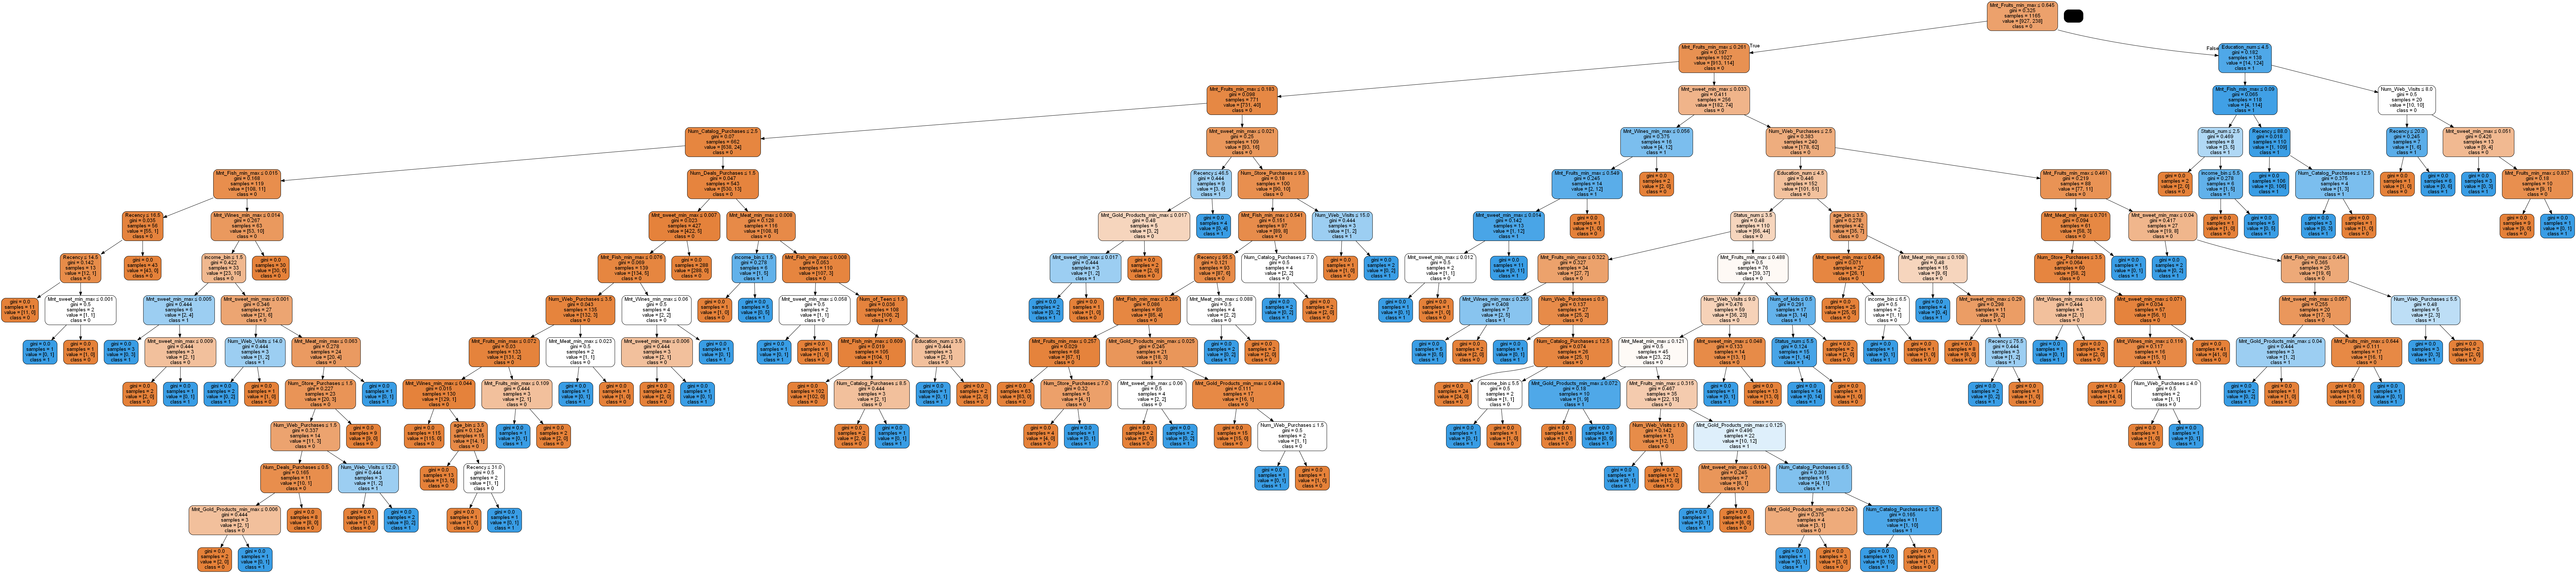

In [8]:
dot = export_graphviz(clf_tree, filled=True, rounded=True, 
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot)  
graph.write_png('tree3.png')
Image(graph.create_png())

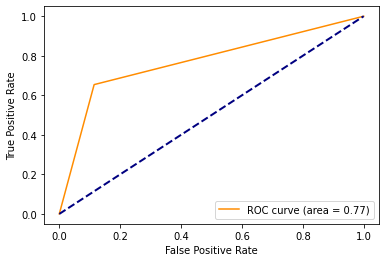

In [9]:
#decision tree - ROC
y_probs_tree = clf_tree.predict_proba(X_test) # probability prediction
fpr_tree, tpr_tree, _ = metrics.roc_curve(y_test, y_probs_tree[:,1])
auc_tree = metrics.auc(fpr_tree, tpr_tree)
plt.figure()
plt.plot(fpr_tree, tpr_tree, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

### Predict the labels for the train set

In [10]:
y_train_pred = clf_tree.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 1.0
sensitivity= 1.0
precision= 1.0


,0,1
0,927,0
1,0,238


In [11]:
#we can see the model is overfit due to the very high scores.

### Decision tree hyper parameters

In [12]:
#decision tree with random hyper parameters
max_depth = [3,5,8,10,15,20]
max_depth.append(None)
criterion = ['gini','entropy']
splitter = ['best', 'random']
min_samples_split = [10,50,75,100,125,200, 500]
min_samples_leaf = [1,5,10,20,50,100, 200, 500]
random_grid = {'criterion': criterion,
               'max_depth': max_depth,
               'splitter': splitter,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'criterion': ['gini', 'entropy'],
 'max_depth': [3, 5, 8, 10, 15, 20, None],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100, 200, 500],
 'min_samples_split': [10, 50, 75, 100, 125, 200, 500],
 'splitter': ['best', 'random']}


In [13]:
#fitting the random parameters decision tree
random_tree = RandomizedSearchCV(estimator = clf_tree, param_distributions = random_grid, n_iter = 528, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

random_tree.fit(X_train, y_train)

Fitting 10 folds for each of 528 candidates, totalling 5280 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=528, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 8, 10, 15, 20,
                                                      None],
                                        'min_samples_leaf': [1, 5, 10, 20, 50,
                                                             100, 200, 500],
                                        'min_samples_split': [10, 50, 75, 100,
                                                              125, 200, 500],
                                        'splitter': ['best', 'random']},
                   random_state=42, verbose=2)

In [14]:
#decision tree best hyper parameters 
random_tree.best_params_

{'splitter': 'random',
 'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_depth': 15,
 'criterion': 'gini'}

In [15]:
#prediction using the random_tree
y_pred = random_tree.predict(X_test)
print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

accuracy= 0.85
sensitivity= 0.5233644859813084
precision= 0.7


,0,1
0,369,24
1,51,56


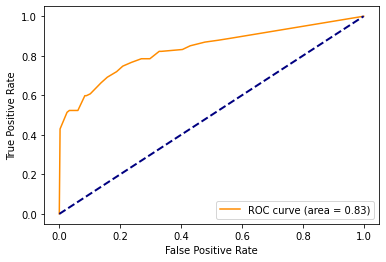

In [16]:
#decision tree with rando, parameters-ROC
y_probs_random_tree = random_tree.predict_proba(X_test) # probability prediction
fpr_random_tree, tpr_random_tree, _ = metrics.roc_curve(y_test, y_probs_random_tree[:,1])
auc_random_tree = metrics.auc(fpr_random_tree, tpr_random_tree)
plt.figure()
plt.plot(fpr_random_tree, tpr_random_tree, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_random_tree)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [17]:
#checking overfitting 
y_train_pred = random_tree.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.8935622317596567
sensitivity= 0.6050420168067226
precision= 0.8275862068965517


,0,1
0,897,30
1,94,144


### Decision tree Grid search

In [18]:
param_grid = {'splitter': ['best'],
 'min_samples_split': [10,50,75,100,125,200, 500],
 'min_samples_leaf': [1,5,10,20,50,100, 200, 500],
 'max_depth': [3,5,8,10,15,20],
 'criterion': ['gini', 'entropy']}

grid_search = GridSearchCV(estimator = clf_tree, param_grid = param_grid, cv = 10, n_jobs = -1, verbose = 2)

In [19]:
#fit
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 10 folds for each of 672 candidates, totalling 6720 fits


{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 50,
 'splitter': 'best'}

In [20]:
#prediction results
best_grid = grid_search.best_estimator_
best_grid.fit(X_train, y_train)
grid_y_pred = best_grid.predict(X_test)

print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))
# grid_accuracy = metrics.accuracy_score(y_test, grid_y_pred)
# print('grid model accuracy = {:0.2f}%'.format(grid_accuracy*100))

accuracy= 0.85
sensitivity= 0.5233644859813084
precision= 0.7


,0,1
0,369,24
1,51,56


### Basic Random Forest

In [21]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest = random_forest.fit(X_train,y_train)
y_pred = random_forest.predict(X_test)

print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))
pd.DataFrame(metrics.confusion_matrix(y_test, y_pred))

accuracy= 0.896
sensitivity= 0.5514018691588785
precision= 0.9365079365079365


,0,1
0,389,4
1,48,59


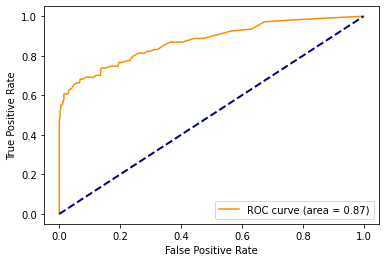

In [22]:
#Basic Random Forest-Roc
y_probs_RF = random_forest.predict_proba(X_test) # probability prediction
fpr_RF, tpr_RF, _ = metrics.roc_curve(y_test, y_probs_RF[:,1])
auc_RF = metrics.auc(fpr_RF, tpr_RF)
plt.figure()
plt.plot(fpr_RF, tpr_RF, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_RF)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [23]:
#checking overfitting for the Basic Random Forest 
y_train_pred = random_forest.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 1.0
sensitivity= 1.0
precision= 1.0


,0,1
0,927,0
1,0,238


In [24]:
#again we overfit

In [25]:
### Hyper Parameters-Random Forest

In [26]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 50)]

max_features = ['auto', 'log2', 2, 5, 8, 16, 19]

max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)

max_samples = [0.1, 0.3, 0.5, 0.7, 0.9]

criterion = ['gini','entropy']

min_samples_split = [10, 20,50,100]

min_samples_leaf = [10,20,50,100]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_samples': max_samples,
                'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)
rf_random = RandomizedSearchCV(estimator = random_forest, param_distributions = random_grid, n_iter = 50, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)

{'criterion': ['gini', 'entropy'],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['auto', 'log2', 2, 5, 8, 16, 19],
 'max_samples': [0.1, 0.3, 0.5, 0.7, 0.9],
 'min_samples_leaf': [10, 20, 50, 100],
 'min_samples_split': [10, 20, 50, 100],
 'n_estimators': [100,
                  118,
                  136,
                  155,
                  173,
                  191,
                  210,
                  228,
                  246,
                  265,
                  283,
                  302,
                  320,
                  338,
                  357,
                  375,
                  393,
                  412,
                  430,
                  448,
                  467,
                  485,
                  504,
                  522,
                  540,
                  559,
                  577,
                  595,
                  614,
                  632,
                  651,
               

In [27]:
#fiting and looking on best params
rf_random.fit(X_train, y_train)
rf_random.best_params_


Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'n_estimators': 742,
 'min_samples_split': 50,
 'min_samples_leaf': 10,
 'max_samples': 0.9,
 'max_features': 16,
 'max_depth': 35,
 'criterion': 'gini'}

In [28]:
#random forest hyper parameters - fit and predict 
best_random = rf_random.best_estimator_
random_y_pred = best_random.predict(X_test)
random_accuracy = metrics.accuracy_score(y_test, random_y_pred)
print('random model accuracy = {:0.2f}%'.format(random_accuracy*100))
print("random model sensitivity = {:0.2f}%".format(metrics.recall_score(y_test, random_y_pred)*100))
print("random model precision = {:0.2f}%".format(metrics.precision_score(y_test, random_y_pred)*100))

random model accuracy = 88.60%
random model sensitivity = 52.34%
random model precision = 90.32%


# SVM classifier

In [29]:
#fitting SVM Model
clf_svm = svm.SVC(kernel='rbf', C=0.9, probability=True)
clf_svm.fit(X_train, y_train)

#predict
y_pred = clf_svm.predict(X_test)

clf_svm_accuracy = metrics.accuracy_score(y_test, y_pred)
clf_svm_sensitivity = metrics.recall_score(y_test, y_pred)
clf_svm_precision = metrics.precision_score(y_test, y_pred)

print('base model accuracy = {:0.2f}%'.format(clf_svm_accuracy*100))
print('base model sensitivity = {:0.2f}%'.format(clf_svm_sensitivity*100))
print('base model precision = {:0.2f}%'.format(clf_svm_precision*100))

print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))

base model accuracy = 87.80%
base model sensitivity = 43.93%
base model precision = 97.92%
     0   1
0  392   1
1   60  47
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93       393
         1.0       0.98      0.44      0.61       107

    accuracy                           0.88       500
   macro avg       0.92      0.72      0.77       500
weighted avg       0.89      0.88      0.86       500



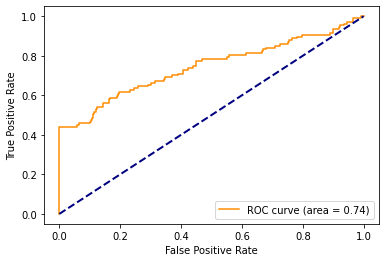

In [30]:
#SVM ROC
#svm  - ROC 
y_probs_svm = clf_svm.predict_proba(X_test) # probability prediction
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test, y_probs_svm[:,1])
auc_svm = metrics.auc(fpr_svm, tpr_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [31]:
#checking for SVM overfit
y_train_pred = clf_svm.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.871244635193133
sensitivity= 0.3739495798319328
precision= 0.9888888888888889


,0,1
0,926,1
1,149,89


## Hyper Parameters for SVM

In [32]:
C = [0.1, 0.3, 0.5, 0.7, 0.9]

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

probability = [True]

decision_function_shape = ['ovo', 'ovr']

random_grid = { 'C': C,
                'kernel': kernel,
               'probability': probability,
               'decision_function_shape': decision_function_shape}
pprint(random_grid)
clf_svm_random = RandomizedSearchCV(estimator = clf_svm, param_distributions = random_grid, cv = 50,
                               verbose = 2, random_state = 42, n_jobs = -1)

{'C': [0.1, 0.3, 0.5, 0.7, 0.9],
 'decision_function_shape': ['ovo', 'ovr'],
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'probability': [True]}


In [33]:
# fit SVM and looking on best Params
clf_svm_random.fit(X_train, y_train)
clf_svm_random.best_params_

Fitting 50 folds for each of 10 candidates, totalling 500 fits


{'probability': True,
 'kernel': 'linear',
 'decision_function_shape': 'ovo',
 'C': 0.5}

In [34]:
#SVM Hyper Parameters-Prediction
#svm hyper parameters - predict 
clf_svm_random_y_pred = clf_svm_random.predict(X_test)
clf_svm_random_accuracy = metrics.accuracy_score(y_test, clf_svm_random_y_pred)
clf_svm_sensitivity = metrics.recall_score(y_test, y_pred)
clf_svm_random_precision = metrics.precision_score(y_test, clf_svm_random_y_pred)

print('random model accuracy = {:0.2f}%'.format(clf_svm_random_accuracy*100))
print('random model sensitivity = {:0.2f}%'.format(clf_svm_sensitivity*100))
print('random model precision = {:0.2f}%'.format(clf_svm_random_precision*100))

random model accuracy = 88.60%
random model sensitivity = 43.93%
random model precision = 100.00%


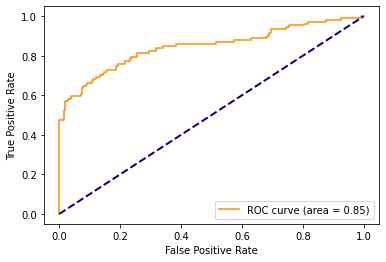

In [35]:
#SVM Hyper Parameters-ROC
y_probs_svm_random = clf_svm_random.predict_proba(X_test) # probability prediction
fpr_svm_random, tpr_svm_random, _ = metrics.roc_curve(y_test, y_probs_svm_random[:,1])
auc_svm_random = metrics.auc(fpr_svm_random, tpr_svm_random)
plt.figure()
plt.plot(fpr_svm_random, tpr_svm_random, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_svm_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [36]:
#checking overfit 
y_train_pred = clf_svm_random.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.8772532188841202
sensitivity= 0.40756302521008403
precision= 0.9797979797979798


,0,1
0,925,2
1,141,97


## AdaBoost classifier

In [37]:
#adaboost fit and predict 
adaBoost = AdaBoostClassifier(random_state=42)
adaBoost.fit(X_train, y_train)
y_pred = adaBoost.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))
print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))

,0,1
0,370,23
1,42,65


              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       393
         1.0       0.74      0.61      0.67       107

    accuracy                           0.87       500
   macro avg       0.82      0.77      0.79       500
weighted avg       0.86      0.87      0.87       500

accuracy= 0.87
sensitivity= 0.6074766355140186
precision= 0.7386363636363636


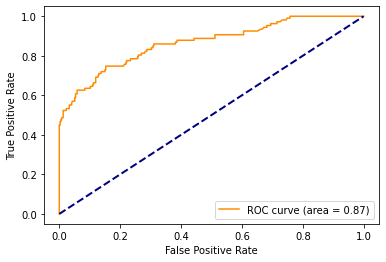

In [38]:
#AdaBoost ROC
y_probs_adaBoost = adaBoost.predict_proba(X_test) # probability prediction
fpr_adaBoost, tpr_adaBoost, _ = metrics.roc_curve(y_test, y_probs_adaBoost[:,1])
auc_adaBoost = metrics.auc(fpr_adaBoost, tpr_adaBoost)
plt.figure()
plt.plot(fpr_adaBoost, tpr_adaBoost, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_adaBoost)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [39]:
#overfir check for adaboost
y_train_pred = adaBoost.predict(X_train)
print("accuracy=",metrics.accuracy_score(y_train, y_train_pred))
print("sensitivity=",metrics.recall_score(y_train, y_train_pred))
print("precision=" ,metrics.precision_score(y_train, y_train_pred))
pd.DataFrame(metrics.confusion_matrix(y_train, y_train_pred))

accuracy= 0.9201716738197425
sensitivity= 0.6638655462184874
precision= 0.9239766081871345


,0,1
0,914,13
1,80,158


### AdaBoost Hyper Parameters

In [40]:
n_estimators = [10, 20, 25, 30,35, 50, 100, 150, 200,400]
random_grid = {'n_estimators': n_estimators}
pprint(random_grid)
adaBoost_random = RandomizedSearchCV(estimator = adaBoost, param_distributions = random_grid, cv = 10,
                               verbose = 2, random_state = 42, n_jobs = -1)
#fit and finding best parameters
adaBoost_random.fit(X_train, y_train)
adaBoost_random.best_params_

{'n_estimators': [10, 20, 25, 30, 35, 50, 100, 150, 200, 400]}
Fitting 10 folds for each of 10 candidates, totalling 100 fits


{'n_estimators': 10}

In [41]:
#AdaBoost Hyper Parameters Predict
y_pred = adaBoost_random.predict(X_test)
display(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
print(metrics.classification_report(y_test,y_pred))
print("accuracy=",metrics.accuracy_score(y_test, y_pred))
print("sensitivity=",metrics.recall_score(y_test, y_pred))
print("precision=" ,metrics.precision_score(y_test, y_pred))

,0,1
0,384,9
1,49,58


              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       393
         1.0       0.87      0.54      0.67       107

    accuracy                           0.88       500
   macro avg       0.88      0.76      0.80       500
weighted avg       0.88      0.88      0.87       500

accuracy= 0.884
sensitivity= 0.5420560747663551
precision= 0.8656716417910447


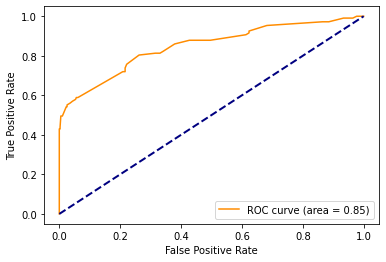

In [42]:
#AdaBoost Hyper Parameters-ROC
y_probs_adaBoost_random = adaBoost_random.predict_proba(X_test) # probability prediction
fpr_adaBoost_random, tpr_adaBoost_random, _ = metrics.roc_curve(y_test, y_probs_adaBoost_random[:,1])
auc_adaBoost_random = metrics.auc(fpr_adaBoost_random, tpr_adaBoost_random)
plt.figure()
plt.plot(fpr_adaBoost_random, tpr_adaBoost_random, color='darkorange', label='ROC curve (area = %0.2f)' %  auc_adaBoost_random)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

#  Model evaluation

In [43]:
random_tree = DecisionTreeClassifier(random_state=42)
best_random = RandomForestClassifier(random_state = 42, criterion="gini", max_depth=None, max_features=8, max_samples=0.6,min_samples_leaf=10,min_samples_split=50, n_estimators=100)
clf_svm_random = svm.SVC(kernel='poly', C=0.9, probability=True, decision_function_shape='ovr')
adaBoost_random = AdaBoostClassifier(random_state=42, n_estimators=150)

## Comparison between the classifiers

In [44]:
X = data_frame[['age_bin', 'Status_num', 'Education_num', 'income_bin', 'Num_of_kids', 'Num_of_Teen', 'Recency', 'Num_Web_Visits', 'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases','Mnt_Meat_min_max','Mnt_Fruits_min_max', 'Mnt_sweet_min_max', 'Mnt_Fish_min_max','Mnt_Gold_Products_min_max','Mnt_Wines_min_max', 'Complain']]
y = data_frame['Responded']

clf_list = [random_tree,best_random, adaBoost_random]
cm_dict, auc_dict = {}, {}
X = X.to_numpy()
y = y.to_numpy()
kf = KFold(n_splits=10, shuffle=True, random_state=42) #for cross validation
k = 0
for train_index, test_index in kf.split(X):
    k+=1
    print("------",k,"------")
    # split to train and test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for clf in clf_list:
        # train the model and make a prediction
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        cm = metrics.confusion_matrix(y_test, y_pred)
        y_probs = clf.predict_proba(X_test) # probability prediction
        fpr, tpr, _ = metrics.roc_curve(y_test, y_probs[:,1])
        auc = metrics.auc(fpr, tpr)
        # save the results
        cm_list = cm_dict.get(clf,[])
        cm_list.append(cm)
        cm_dict[clf] = cm_list
        auc_list = auc_dict.get(clf,[])
        auc_list.append(auc)
        auc_dict[clf] = auc_list
        # print the results
        print("Classifier: ", clf)
        print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

------ 1 ------
Classifier:  DecisionTreeClassifier(random_state=42)
Accuracy:  0.844311377245509
Classifier:  RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)
Accuracy:  0.8922155688622755
Classifier:  AdaBoostClassifier(n_estimators=150, random_state=42)
Accuracy:  0.9041916167664671
------ 2 ------
Classifier:  DecisionTreeClassifier(random_state=42)
Accuracy:  0.8502994011976048
Classifier:  RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)
Accuracy:  0.8802395209580839
Classifier:  AdaBoostClassifier(n_estimators=150, random_state=42)
Accuracy:  0.8802395209580839
------ 3 ------
Classifier:  DecisionTreeClassifier(random_state=42)
Accuracy:  0.8143712574850299
Classifier:  RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_stat

## Print average results:

In [45]:
acc_dict = {}
prec_dict = {}
sen_dict = {}
for clf in clf_list:
    print(f"Classfier: {clf}\n")
    acc = [(cm[0][0]+cm[1][1])/sum(sum(cm)) for cm in cm_dict[clf]]
    acc_dict[clf] = acc 
    print("mean accuracy: ", np.mean(acc))
    precision = [(cm[1][1])/(cm[1][1]+cm[0][1]) for cm in cm_dict[clf]]
    prec_dict[clf] = precision
    print("mean precision: ", np.mean(precision))
    sensitivity = [(cm[1][1])/(cm[1][1]+cm[1][0]) for cm in cm_dict[clf]]
    sen_dict[clf] = sensitivity
    print("mean sensitivity: ", np.mean(sensitivity))
    print("mean AUC: ", np.mean(auc_dict[clf]))

Classfier: DecisionTreeClassifier(random_state=42)

mean accuracy:  0.8486869634225525
mean precision:  0.6211893868035869
mean sensitivity:  0.6881783474455888
mean AUC:  0.7898328101752998
Classfier: RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)

mean accuracy:  0.8901125459923527
mean precision:  0.9066717188227486
mean sensitivity:  0.5218472953817781
mean AUC:  0.8975015837633068
Classfier: AdaBoostClassifier(n_estimators=150, random_state=42)

mean accuracy:  0.8816896327826275
mean precision:  0.7852925528577702
mean sensitivity:  0.5947089482434309
mean AUC:  0.8895354080700603


## Statistical Significance Tests

In [46]:
for clf_a, clf_b in combinations(clf_list, 2):
    ttest,pval = stats.ttest_rel(acc_dict[clf_a], acc_dict[clf_b])
    print(str(clf_a) + " + " + str(clf_b))
    print("p-value:" , pval)
    if pval<0.05:
        print("accuracy reject null hypothesis")
    else:
        print("accuracy accept null hypothesis")
    print()

DecisionTreeClassifier(random_state=42) + RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)
p-value: 6.589360122585213e-05
accuracy reject null hypothesis

DecisionTreeClassifier(random_state=42) + AdaBoostClassifier(n_estimators=150, random_state=42)
p-value: 0.0008633783782715839
accuracy reject null hypothesis

RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42) + AdaBoostClassifier(n_estimators=150, random_state=42)
p-value: 0.08857720157538594
accuracy accept null hypothesis



In [47]:
for clf_a, clf_b in combinations(clf_list, 2):
    ttest,pval = stats.ttest_rel(prec_dict[clf_a], prec_dict[clf_b])
    print(str(clf_a) + " + " + str(clf_b))
    print("p-value:" , pval)
    if pval<0.05:
        print("precision reject null hypothesis")
    else:
        print("precision accept null hypothesis")
    print()

DecisionTreeClassifier(random_state=42) + RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)
p-value: 9.996323904492651e-09
precision reject null hypothesis

DecisionTreeClassifier(random_state=42) + AdaBoostClassifier(n_estimators=150, random_state=42)
p-value: 4.674453369543029e-05
precision reject null hypothesis

RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42) + AdaBoostClassifier(n_estimators=150, random_state=42)
p-value: 0.00012964174613678772
precision reject null hypothesis



In [48]:
for clf_a, clf_b in combinations(clf_list, 2):
    ttest,pval = stats.ttest_rel(sen_dict[clf_a], sen_dict[clf_b])
    print(str(clf_a) + " + " + str(clf_b))
    print("p-value:" , pval)
    if pval<0.05:
        print("sensitivity reject null hypothesis")
    else:
        print("sensitivity accept null hypothesis")
    print()

DecisionTreeClassifier(random_state=42) + RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42)
p-value: 6.661676468162984e-06
sensitivity reject null hypothesis

DecisionTreeClassifier(random_state=42) + AdaBoostClassifier(n_estimators=150, random_state=42)
p-value: 0.002033329452031691
sensitivity reject null hypothesis

RandomForestClassifier(max_features=8, max_samples=0.6, min_samples_leaf=10,
                       min_samples_split=50, random_state=42) + AdaBoostClassifier(n_estimators=150, random_state=42)
p-value: 0.0030017585229341805
sensitivity reject null hypothesis



## Test Data

In [49]:
#we did the preprocess in another jupyter notebook for conviniance 
df_test = pd.read_csv('./Data_Test_V3.csv', index_col=0)
df_test.head()

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,age_bin,income_bin,Mnt_Fruits_min_max,Mnt_Meat_min_max,Mnt_sweet_min_max,Mnt_Wines_min_max,Mnt_Gold_Products_min_max,Mnt_Fish_min_max,Responded_old_campains,Responded
ID,,,,,,,,,,,,,,,,,,,,,
5430,1956.0,Graduation,Together,54450.0,1.0,1.0,14/09/2012,0,454.0,0.0,...,4.0,7.0,0.310534,0.000000,0.106409,0.032,0.097938,0.129555,0,NaN
8996,1957.0,PhD,Married,53761.0,2.0,1.0,19/11/2012,4,230.0,42.0,...,4.0,7.0,0.157319,0.211055,0.119477,0.196,0.190722,0.214575,0,NaN
8432,1956.0,Graduation,Together,53761.0,1.0,1.0,14/09/2012,0,454.0,0.0,...,4.0,7.0,0.310534,0.000000,0.106409,0.032,0.097938,0.129555,0,NaN
6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,50.0,...,4.0,7.0,0.564979,0.251256,0.197262,0.200,0.195876,0.153846,0,NaN
2552,1955.0,PhD,Single,55521.0,1.0,2.0,22/10/2013,11,416.0,0.0,...,4.0,7.0,0.284542,0.000000,0.016179,0.000,0.000000,0.016194,0,1.0


In [50]:
#add new col to enter the predict result 
df_test['Will_responde']=0
df_test.head()

,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,income_bin,Mnt_Fruits_min_max,Mnt_Meat_min_max,Mnt_sweet_min_max,Mnt_Wines_min_max,Mnt_Gold_Products_min_max,Mnt_Fish_min_max,Responded_old_campains,Responded,Will_responde
ID,,,,,,,,,,,,,,,,,,,,,
5430,1956.0,Graduation,Together,54450.0,1.0,1.0,14/09/2012,0,454.0,0.0,...,7.0,0.310534,0.000000,0.106409,0.032,0.097938,0.129555,0,NaN,0
8996,1957.0,PhD,Married,53761.0,2.0,1.0,19/11/2012,4,230.0,42.0,...,7.0,0.157319,0.211055,0.119477,0.196,0.190722,0.214575,0,NaN,0
8432,1956.0,Graduation,Together,53761.0,1.0,1.0,14/09/2012,0,454.0,0.0,...,7.0,0.310534,0.000000,0.106409,0.032,0.097938,0.129555,0,NaN,0
6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,50.0,...,7.0,0.564979,0.251256,0.197262,0.200,0.195876,0.153846,0,NaN,0
2552,1955.0,PhD,Single,55521.0,1.0,2.0,22/10/2013,11,416.0,0.0,...,7.0,0.284542,0.000000,0.016179,0.000,0.000000,0.016194,0,1.0,0


In [54]:
X = df_test[['age_bin', 'Status_num', 'Education_num', 'income_bin', 'Num_of_kids', 'Num_of_Teen', 'Recency', 'Num_Web_Visits', 'Num_Web_Purchases', 'Num_Store_Purchases', 'Num_Deals_Purchases', 'Num_Catalog_Purchases','Mnt_Meat_min_max','Mnt_Fruits_min_max', 'Mnt_sweet_min_max', 'Mnt_Fish_min_max','Mnt_Gold_Products_min_max','Mnt_Wines_min_max', 'Complain']]
Y = adaBoost_random.predict(X)
df_test['Will_responde']= Y.tolist()
df_test.to_csv('./Campain_Predict_v2_Ada.csv')
df_test.head()
# clf_list = clf_list = [random_tree,best_random, adaBoost_random]

d:\classprojects\data_mining\conda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


,Year_Birth,Education,Status,Income,Num_of_kids,Num_of_Teen,Registration_date,Recency,Mnt_Fruits,Mnt_Meat,...,income_bin,Mnt_Fruits_min_max,Mnt_Meat_min_max,Mnt_sweet_min_max,Mnt_Wines_min_max,Mnt_Gold_Products_min_max,Mnt_Fish_min_max,Responded_old_campains,Responded,Will_responde
ID,,,,,,,,,,,,,,,,,,,,,
5430,1956.0,Graduation,Together,54450.0,1.0,1.0,14/09/2012,0,454.0,0.0,...,7.0,0.310534,0.000000,0.106409,0.032,0.097938,0.129555,0,NaN,0.0
8996,1957.0,PhD,Married,53761.0,2.0,1.0,19/11/2012,4,230.0,42.0,...,7.0,0.157319,0.211055,0.119477,0.196,0.190722,0.214575,0,NaN,0.0
8432,1956.0,Graduation,Together,53761.0,1.0,1.0,14/09/2012,0,454.0,0.0,...,7.0,0.310534,0.000000,0.106409,0.032,0.097938,0.129555,0,NaN,0.0
6566,1954.0,PhD,NaN,72550.0,1.0,1.0,08/11/2012,39,826.0,50.0,...,7.0,0.564979,0.251256,0.197262,0.200,0.195876,0.153846,0,NaN,0.0
2552,1955.0,PhD,Single,55521.0,1.0,2.0,22/10/2013,11,416.0,0.0,...,7.0,0.284542,0.000000,0.016179,0.000,0.000000,0.016194,0,1.0,0.0
